In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
customer_df = pd.read_csv('customers.csv', index_col='CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
customer_df.drop_duplicates(inplace=True)

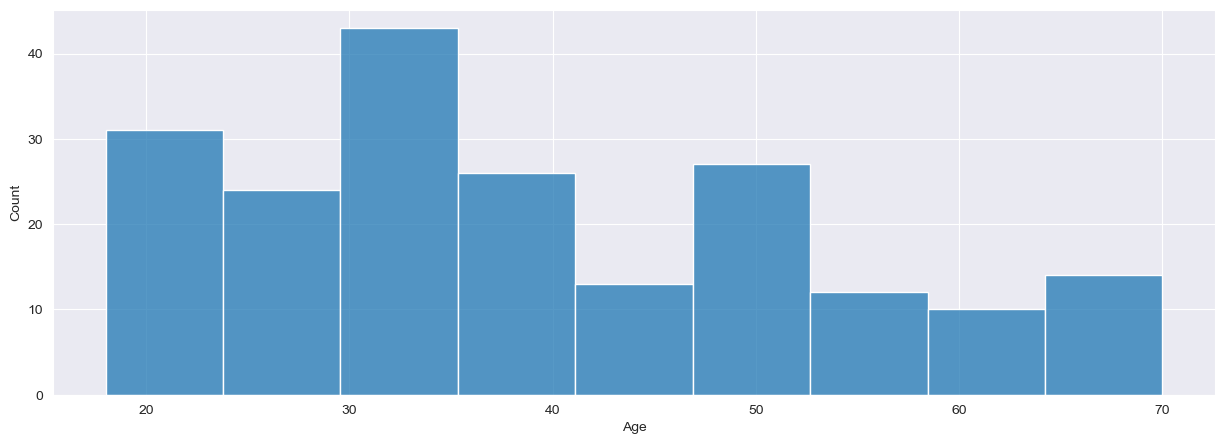

In [7]:
sns.histplot(customer_df['Age'])
plt.show()

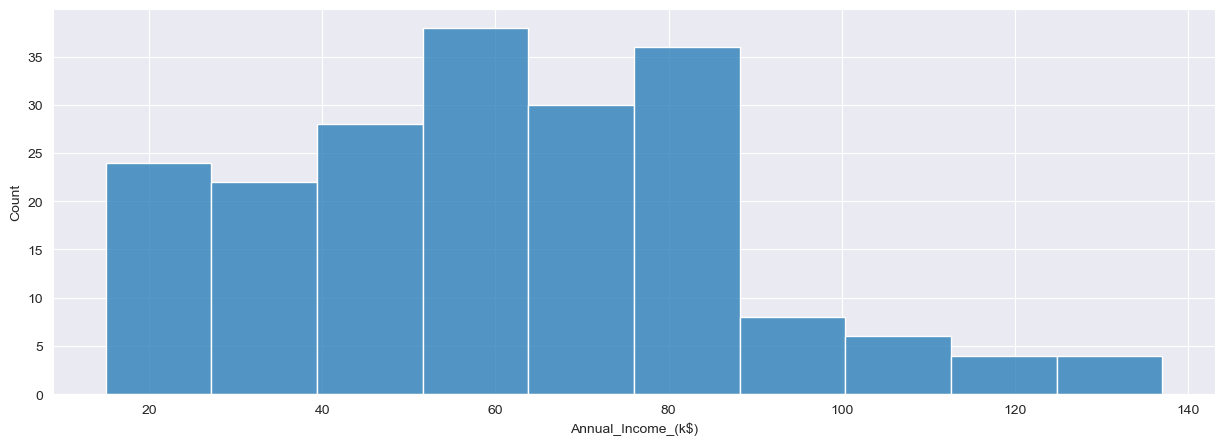

In [8]:
sns.histplot(customer_df['Annual_Income_(k$)'])
plt.show()

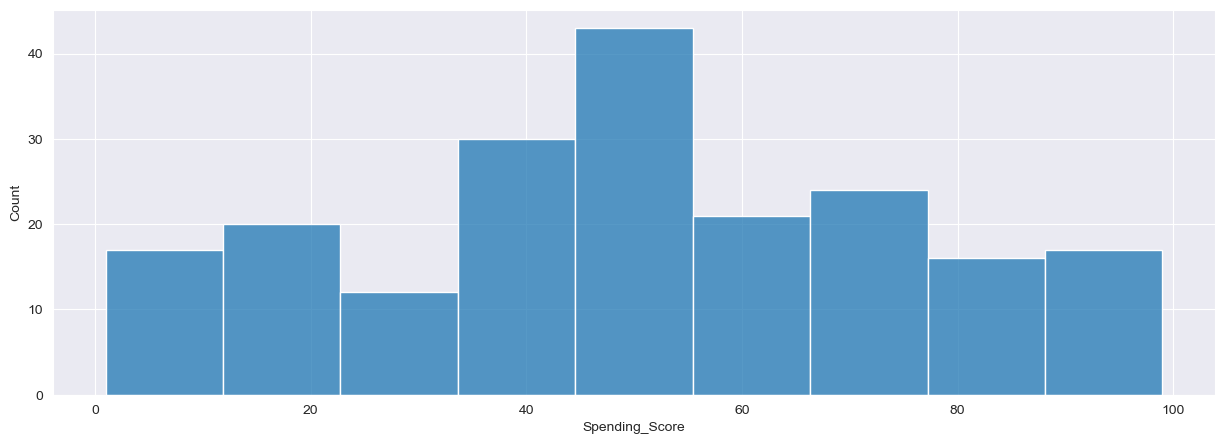

In [9]:
sns.histplot(customer_df['Spending_Score'])
plt.show()

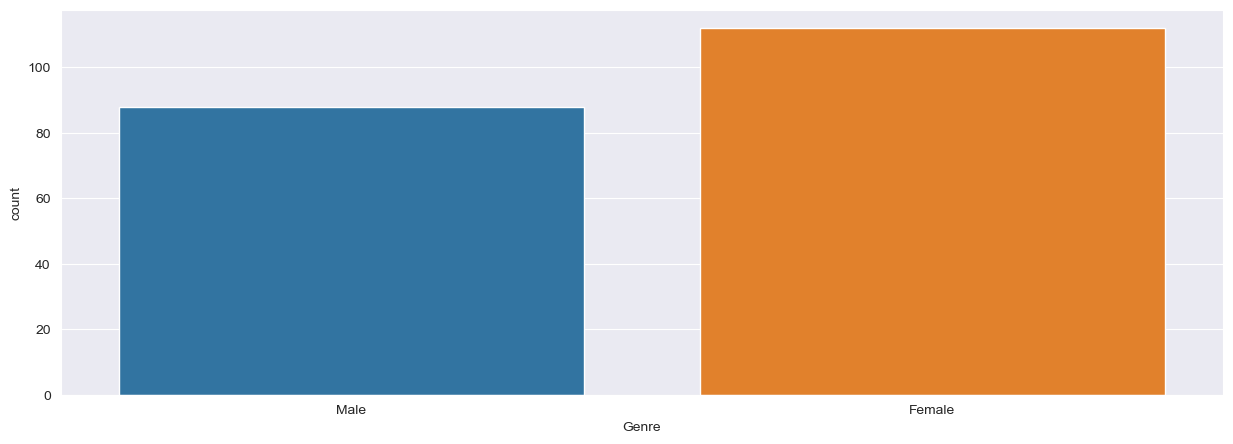

In [10]:
sns.countplot(x = customer_df['Genre'])
plt.show()

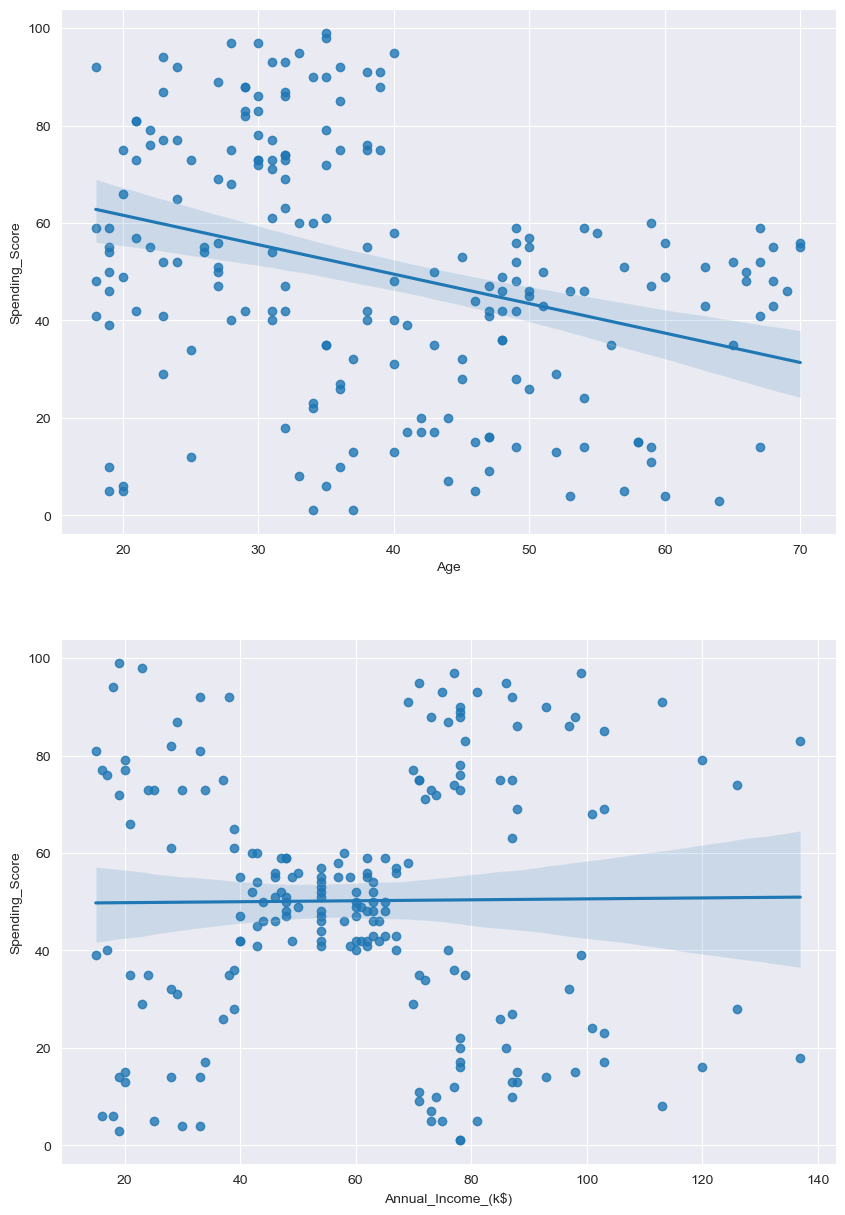

In [11]:
fig, axes = plt.subplots(2,figsize=(10,15))

sns.regplot(x=customer_df['Age'], y=customer_df['Spending_Score'], ax=axes[0])
sns.regplot(x=customer_df['Annual_Income_(k$)'], y=customer_df['Spending_Score'], ax=axes[1])
plt.show()

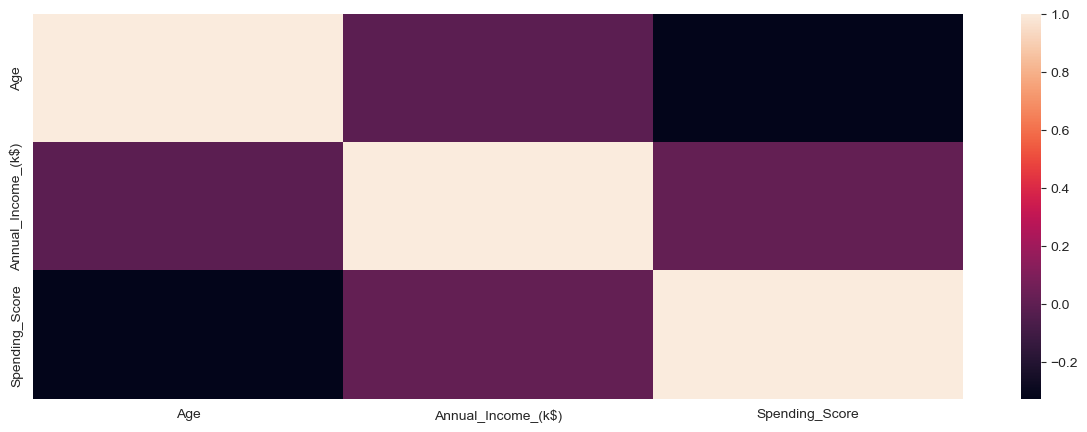

In [12]:
sns.heatmap(customer_df[['Age', 'Annual_Income_(k$)','Spending_Score']].corr())
plt.show()

In [13]:
X = customer_df.iloc[:, [2, 3]].values

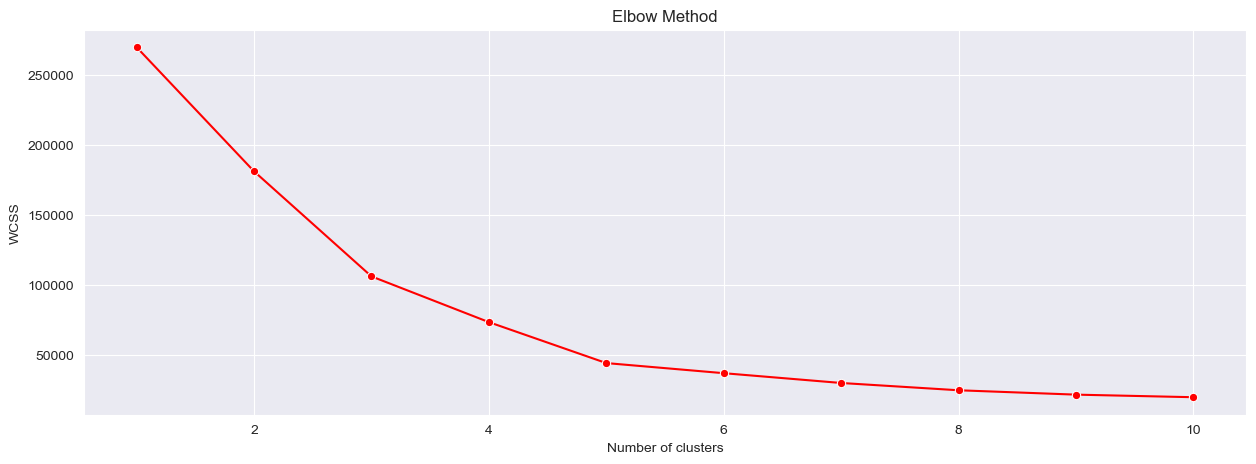

In [16]:
import warnings
warnings.filterwarnings('ignore')

#elbow method to find optimal number of clusters
from sklearn.cluster import KMeans

#where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    #random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    #inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

#creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [18]:
X[y_pred == 0, 0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

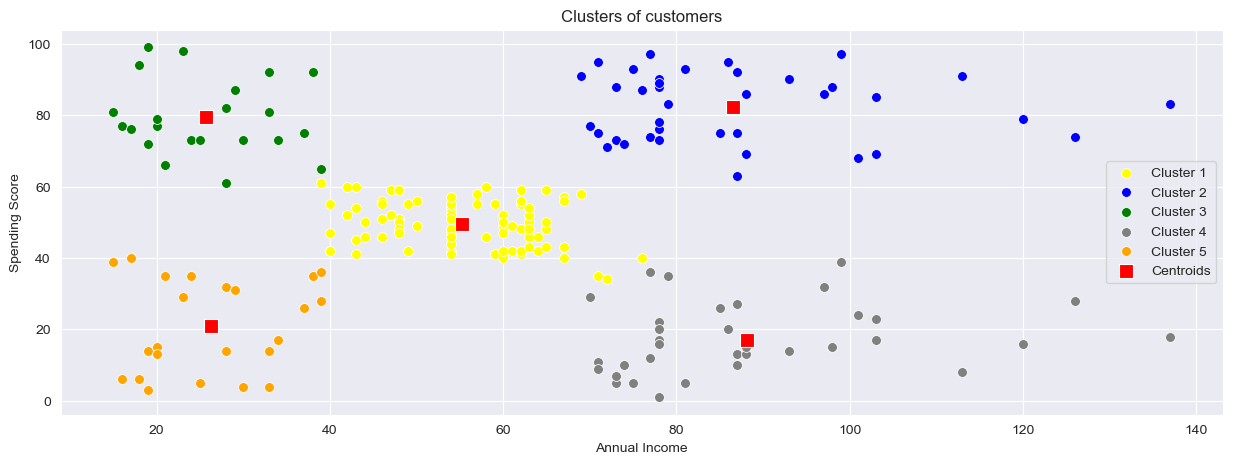

In [19]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [20]:
#could we have chosen a different number of clusters?
#elbow at 3 as well
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

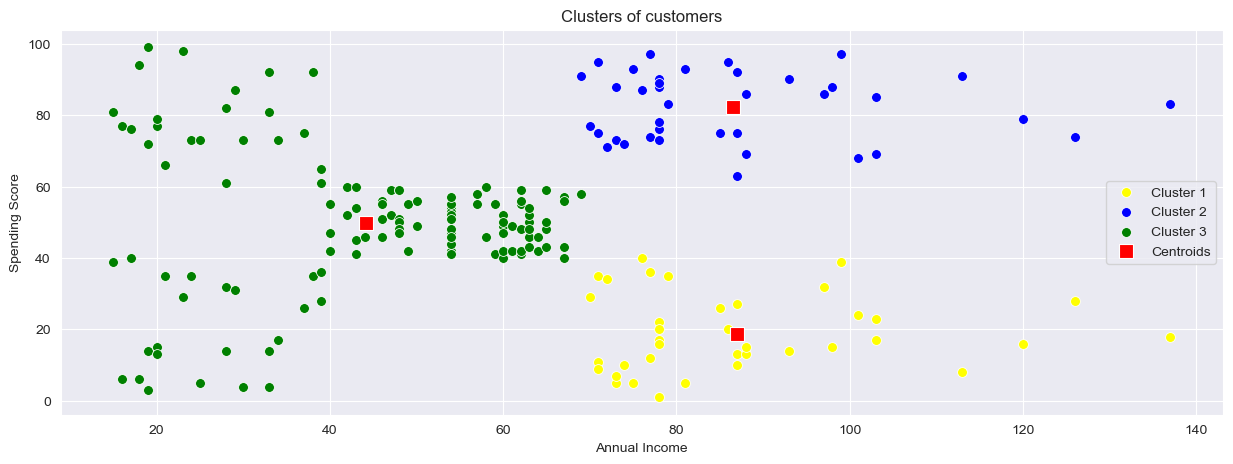

In [21]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()